<a href="https://colab.research.google.com/github/SushekTamrakar/ai-job-description/blob/main/Ragipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyMuPDF==1.23.26
!pip install matplotlib==3.8.3
!pip install numpy==1.26.4
!pip install pandas==2.2.1
!pip install Requests==2.31.0
!pip install sentence_transformers==2.5.1
!pip install spacy
!pip install tqdm==4.66.2
!pip install transformers==4.38.2
!pip install accelerate
!pip install bitsandbytes
!pip install wheel
!pip install -U "huggingface_hub[cli]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 91.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 86.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.0 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depe

In [ ]:
# Get GPU available memory

import torch

gpu_memory_bytes= torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU Memory: {gpu_memory_gb} GB")

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
# Note: THe following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use

if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended Model: Gemma 2B im 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU Memory: {gpu_memory_gb} | Recommended Model: Gemma 2B in float 16 or Gemma 7B in 4 bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gp_memory_gb > 19.0:
    print(f"GPU Memory: {gpu_memory_gb} | Recommended Model: Gemma 7B in 4 bit precision or float16 precision.")


In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/text_chunks_and_embeddings_df.csv"

In [ ]:
import pandas as pd
embedding_df_save_path = path
text_chunks_and_embeddings_df_load = pd.read_csv(embedding_df_save_path)
text_chunks_and_embeddings_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-20,PRENTICE HALL SERIES IN ARTIFICIAL INTELLIGENC...,327,47,81.75,[-1.30461548e-02 2.68112104e-02 -4.13668528e-...
1,-19,Artiﬁcial Intelligence A Modern Approach Third...,420,61,105.00,[ 5.09229582e-03 5.46925478e-02 -6.23469651e-...
2,-18,"Vice President and Editorial Director, ECS: Ma...",2130,308,532.50,[ 5.17049171e-02 3.89343500e-02 -2.46169083e-...
3,-15,Preface Artiﬁcial Intelligence (AI) is a big ﬁ...,1245,198,311.25,[ 3.05054262e-02 1.73628889e-02 -4.83833812e-...
4,-15,Most important from our point of view is the c...,1646,258,411.50,[ 2.90427636e-02 7.53119681e-03 -3.85300419e-...


If your embedding database is really large (e.g. over 100k - 1M samples) you might want to look into vector database for storage

# RAG - Search and Answer

Rag Goal: Retrieve relevent passages based on a query and use those passages to augment an input to an LLM so it can generate an output based on those relevant passages.

# Similarity Search
Embeddings can be used for almost any type of data.

for example, you can turn images into embeddings, sound into embeddings, sount into embeddings, text into embeddings, etc .....

Comparing embeddings is known as similarity search, vector search, semantic search.

In our case, we want to query our "AI advantages" I should get relevant passes to that text but may not contain exactly the words "AI Advantange".

Whereas with keyword search, if I search "apple" I get back passages with specifically "apple".

In [ ]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

#Import texts and embedding df
text_chunks_and_embedding_df = pd.read_csv(path)

# Convert embedding column back to np.array ( it got saved to string when it is saved to csv )
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x:np.fromstring(x.strip("[]"), sep=" "))

#Convert our embeddings into a toerch.tensor
embeddings = torch.tensor(np.stack(text_chunks_and_embedding_df["embedding"].tolist(), axis=0), dtype=torch.float32).to(device)

#Convert texts and embedding df to list of dicts
pages_and_chunk = text_chunks_and_embedding_df.to_dict(orient="records")

text_chunks_and_embedding_df

cuda


,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-20,PRENTICE HALL SERIES IN ARTIFICIAL INTELLIGENC...,327,47,81.75,"[-0.0130461548, 0.0268112104, -0.0413668528, -..."
1,-19,Artiﬁcial Intelligence A Modern Approach Third...,420,61,105.00,"[0.00509229582, 0.0546925478, -0.0623469651, 0..."
2,-18,"Vice President and Editorial Director, ECS: Ma...",2130,308,532.50,"[0.0517049171, 0.03893435, -0.0246169083, -0.0..."
3,-15,Preface Artiﬁcial Intelligence (AI) is a big ﬁ...,1245,198,311.25,"[0.0305054262, 0.0173628889, -0.0483833812, -0..."
4,-15,Most important from our point of view is the c...,1646,258,411.50,"[0.0290427636, 0.00753119681, -0.00385300419, ..."
...,...,...,...,...,...,...
3643,1124,"1128 Index Sulawesi, 223 SUMMATION, 1053 summe...",3801,620,950.25,"[-0.0216913726, -0.0157258194, -0.0309953503, ..."
3644,1125,"Index 1129 Thrun, S., 28, 605, 686, 884, 1012–...",3715,588,928.75,"[-0.00437530549, -0.046816051, -0.050273262, 0..."
3645,1126,"1130 Index unit (in a neural network), 728 uni...",3842,631,960.50,"[0.0145545248, 0.0322869122, -0.0100467736, -0..."
3646,1127,"Index 1131 Voronoi graph, 991 Vossen, T., 396,...",4003,719,1000.75,"[-0.0571542569, -0.00714794127, -0.0141823478,..."


In [ ]:
embeddings.shape

torch.Size([3648, 768])

In [ ]:
# Create model
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device=device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when poss

Embedding model ready

Let's create a small semantic search pipeline.

In essence, we want to search for a query (e.g. "AI Advantage") and get back relevant passages from out textbook pdf.

We can do so with the following steps:
1. Define a query string.
2. Turn the query string into embedding.
3. Perform a dot product or cosine similarity function between text embeddings and the query embedding.
4. Sort the results in the descending order

Note: to use dot product for comaprision, ensure vector sizes are of same shape(e.g. 768) and tensors/vectors are in the same datatype (e.
g. both are in torch.float32).


### 1. Define the query

In [ ]:
query = "What is Nearest Neighbour Search?"
print(f"Query: {query}")

Query: What is Nearest Neighbour Search?


### 2. Embed the query
Note: It's important to  embed your query with the same model you embedding your passages

In [ ]:
query_embedding = embedding_model.encode(query, convert_to_tensor=True).to("cuda")

### 3. Get Similarity Scores with the dot product (use cosing similarity if outputs of model aren't normalized)

In [ ]:
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores om {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

[INFO] Time taken to get scores om 3648 embeddings: 0.01201 seconds.


### 4. Get the top k results(we'll keep top 5)

In [ ]:
%%time
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

CPU times: user 40.5 ms, sys: 17.5 ms, total: 58 ms
Wall time: 129 ms


torch.return_types.topk(
values=tensor([0.5848, 0.5790, 0.5743, 0.5611, 0.5552], device='cuda:0'),
indices=tensor([2026, 2035, 2034, 2032, 2030], device='cuda:0'))

In [ ]:
pages_and_chunk[2603]

{'page_number': 948,
 'sentence_chunk': '952 Chapter 24. Perception (a) (b) Figure 24.19 (a) Three-dimensional reconstruction of the locations of the image features in Figure 24.18, shown from above. (b) The real house, taken from the same position.1. Differences in the distances of the texels from the camera. Distant objects appear smaller by a scaling factor of 1/Z. 2. Differences in the foreshortening of the texels. If all the texels are in the ground plane then distance ones are viewed at an angle that is farther off the perpendicular, and so are more foreshortened. The magnitude of the foreshortening effect is proportional to cos σ, where σ is the slant, the angle between the Z-axis and n, the surface normal to the texel. Researchers have developed various algorithms that try to exploit the variation in the appearance of the projected texels as a basis for determining surface normals.',
 'chunk_char_count': 861,
 'chunk_word_count': 143,
 'chunk_token_count': 215.25,
 'embedding':

We can see that searching over embedding is very fast.

But if you had 10M+ embeddings, you likely want to create an index.

An index is the letters in the dictionary.

For e.g., if you wanted to search "duck" in the dictionary, you'd start at "d" then find words close to "du..." etc.

An  index helps to narrow it down.

A popular indexing library for vector search is false, see: Approximate Nearest Neighbour Search. (ANN)

Lers make our vector search preety

In [ ]:
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrao_length)
    print(wrapped_text)

In [ ]:
print(f"Query: '{query}'")
print("Results")

for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:4f}")
    print("Text:")
    print(pages_and_chunk[idx]["sentence_chunk"])
    print(f"Page Number: {pages_and_chunk[idx]['page_number']}")
    print("/n")

Query: 'What is Nearest Neighbour Search?'
Results
Score: 0.584829
Text:
In Figure 18.26, we show the decision boundary of k-nearest-neighbors classiﬁcation for k = 1 and 5 on the earthquake data set from Figure 18.15. Nonparametric methods are still subject to underﬁtting and overﬁtting, just like parametric methods. In this case 1-nearest neighbors is overﬁtting; it reacts too much to the black outlier in the upper right and the white outlier at (5.4, 3.7). The 5-nearest-neighbors decision boundary is good; higher k would underﬁt. As usual, cross-validation can be used to select the best value of k. The very word “nearest” implies a distance metric. How do we measure the distance from a query point xq to an example point xj?Typically, distances are measured with a Minkowski distance or Lp norm, deﬁned as MINKOWSKI DISTANCE Lp(xj, xq) = (  i |xj,i − xq,i|p)1/p . With p = 2 this is Euclidean distance and with p = 1 it is Manhattan distance. With Boolean attribute values, the number of

Note: We could potentially improve the order of the results with a re ranking order. A model that has been trained specifically to take search results (eg. the top 25 semantic results) and rank them in order from most likely to top 1 to least likely.

See here for open source reranking model
https://huggingface.co/mixedbread-ai/mxbai-rerank-large-v1

To check out results, what if we wanted to automatically surface the page of texts related to our query?

In [ ]:
import fitz

#open pdf and load target
pdf_path = "/content/drive/MyDrive/Artificial Intelligence - A modern Approach.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(734 + 22)

img = page.get_pixmap(dpi=300)
img.save('output_filename.png')
doc.close()

#Convert the pixmap to numpy array
img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

img_array


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

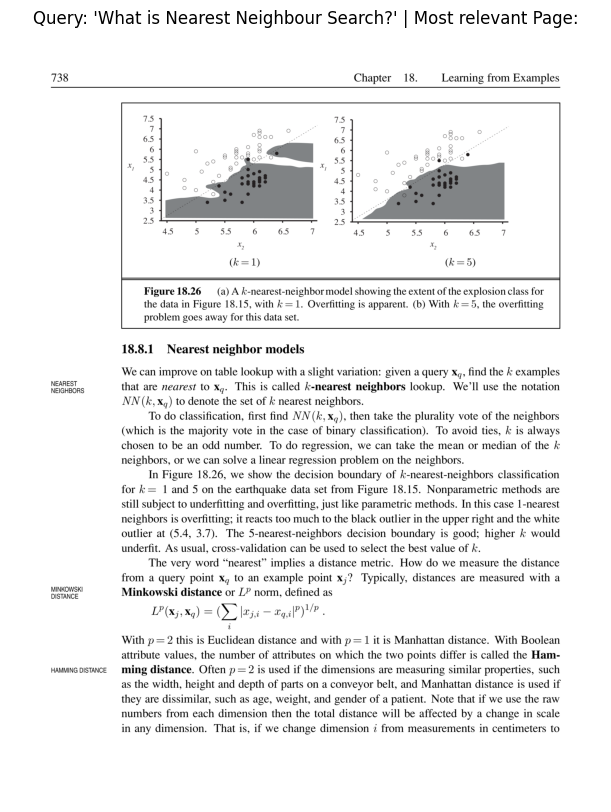

In [ ]:
# Display usinng matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant Page:")
plt.axis("off")
plt.show()

### Similarity measures: dot product and cosing similarity

Two of the most common similarity measures between vectors are dot product and cosine similarity.

In essence, closer vectors will have higher scores, further away vectors will have lower scores.

Vector have direction (which way is it going?)  and magnitude (how long is it?)

In [ ]:
import torch

def dot_product(vector1, vector2):
    return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
    dot_product = torch.dot(vector1, vector2)

    #Get Euclidean/L2 norm
    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 =  torch.sqrt(torch.sum(vector2**2))

    return dot_product / (norm_vector1 * norm_vector2)

# Examples vector/tensors
vector1 = torch.tensor([1,2,3], dtype=torch.float32)
vector2 = torch.tensor([1,2,3], dtype=torch.float32)
vector3 = torch.tensor([4,5,6], dtype=torch.float32)
vector4 = torch.tensor([-1, -2, -3], dtype=torch.float32)

#Calculate dot product
print("Dot product between vector1 and vector2 is:", dot_product(vector1, vector2))
print("Dot product between vector1 and vector2 is:", dot_product(vector1, vector3))
print("Dot product between vector1 and vector2 is:", dot_product(vector1, vector4))

# Cosine Similarity
print("Cosine Similarity between vector1 and vector2 is:", cosine_similarity(vector1, vector2))
print("Cosine Similaruty between vector1 and vector2 is:", cosine_similarity(vector1, vector3))
print("Cosine Similarity between vector1 and vector2 is:", cosine_similarity(vector1, vector4))



Dot product between vector1 and vector2 is: tensor(14.)
Dot product between vector1 and vector2 is: tensor(32.)
Dot product between vector1 and vector2 is: tensor(-14.)
Cosine Similarity between vector1 and vector2 is: tensor(1.0000)
Cosine Similaruty between vector1 and vector2 is: tensor(0.9746)
Cosine Similarity between vector1 and vector2 is: tensor(-1.0000)


### Functionizing our semantic search pipeline

Let's put all of the steps from above for semantic search into a functionor two so we can repeat the workflow.

In [ ]:
def retriece_relevant_resources(query:str, embeddings: torch.tensor, model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5, print_time: bool=True):
    """
    Embeds a query with model and returns top k scores and indices from embeddings.
    """

    # Embed the query
    query_embedding = model.encode(query, convert_to_tensor=True)

    # Get dot product scores on embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"Information: Time taken to get scores on ({len(embeddings)}) embeddings: {end_time - start_time:5f} seconds.")

    scores, indices = torch.topk(input=dot_scores, k=n_resources_to_return)

    return scores, indices

In [ ]:
retriece_relevant_resources(query="Cosine Similarity", embeddings=embeddings)

Information: Time taken to get scores on (3648) embeddings: 0.000076 seconds.


(tensor([0.3403, 0.3378, 0.3371, 0.3278, 0.3139], device='cuda:0'),
 tensor([2651, 2071, 2603, 2621, 2072], device='cuda:0'))

In [ ]:
def print_top_results_and_scores(query: str, embeddings: torch.tensor, pages_and_chunks: list[dict]=pages_and_chunk,
                                 n_resources_to_return: int=5):
    """
    Find relevant passages given a query and prints them out along with thier scores.
    """
    scores, indices = retriece_relevant_resources(query=query, embeddings=embeddings, n_resources_to_return=n_resources_to_return)

    for score, idx in zip(scores,indices):
        print(f"Score: {score:4f}")
        print("Text:")
        print(pages_and_chunk[idx]["sentence_chunk"])
        print(f"Page Number: {pages_and_chunk[idx]['page_number']}")
        print("/n")

In [ ]:
query="What is back propagation?"
retriece_relevant_resources(query=query, embeddings=embeddings)
print_top_results_and_scores(query=query, embeddings=embeddings)

Information: Time taken to get scores on (3648) embeddings: 0.000084 seconds.
Information: Time taken to get scores on (3648) embeddings: 0.000080 seconds.
Score: 0.717930
Text:
734 Chapter 18. Learning from Examples function BACK-PROP-LEARNING(examples,network) returns a neural network inputs: examples, a set of examples, each with input vector x and output vector y network, a multilayer network with L layers, weights wi,j, activation function g local variables: Δ, a vector of errors, indexed by network node repeat for each weight wi,j in network do wi,j ← a small random number for each example (x, y) in examples do /* Propagate the inputs forward to compute the outputs */ for each node i in the input layer do ai ← xi for ℓ = 2 to L do for each node j in layer ℓ do inj ←  i wi,j ai aj ← g(inj) /* Propagate deltas backward from output layer to input layer */ for each node j in the output layer do Δ[j] ← g′(inj) × (yj − aj) for ℓ = L − 1 to 1 do for each node i in layer ℓ do Δ[i] ← g′(

### Getting an LLM for local generation

We want to focus on local generation.

However, this process will also work with an LLM.

So, What is GEnerative LLM?
- Goes from text impit -> generate text output?

Which LLM Should I Use?
- How much hardware VRAM do you have available?

# Loading an LLM Locally

We can load an llm, locally using huggingface Transformers

To get a model running local we're going to need a few things
1. A quantization config (optional) - a config on what precision t load the model in (e.g., 4bit, etc)
2. A Model ID - this will tell transformers which model.tokenizer to load
3. A tokenizer - this turns text into numbers for the LLM (note: a tokenizer is different form and embedding)
4. A LLm Model - this will be what we use to genereate text based on an input

Note: There are many tips and tricks on oading/making LLms work faster. One of the best ones is flash_attn (Flash Attention 22). See the github for more.

https://github.com/Dao-AILab/flash-attention

In [ ]:
!pip install flash-attn --no-build-isolation

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

#1. Create a quantization config
# Note: requires !pip install bitsandbytes accelerate

from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
)

# BonusL Flash Attention 2 = faster attention mechanism
#Flash Attention 2 requires a GPU with a compute capability score of 8.0+ (Ampere, Ada Lovelave, Hopper and above)

if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability()[0] >= 8):
  attn_implementation = 'flash_attention_2'
else:
  attn_implementation = "sdpa" # scaled dot product

print("Using", attn_implementation, "Implementation")

# 2. Pick a model we'd like to use
# model_id = "google/gemma-7b-lt"
model_id = model_id

#3 Instantiate tokenizer ( tokenizer turns text into tokens)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

#4 . Instantiate the model

llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16,
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False, # use as much memory as we can
                                                 attn_implementation=attn_implementation)

if not use_quantization_config:
  llm_model.to(device="cuda")

Using sdpa Implementation


tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [ ]:
llm_model

GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaSdpaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): GemmaRotaryEmbedding()
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear(in_features=16384, out_features=2048, bias=False)
          (act_fn): GELUActivation()
        )
        (input_layernorm): GemmaRMSNorm()
        (post_attention_layernorm): GemmaRMSNorm()
      )
    )
    (norm): GemmaRM

In [ ]:
torch.cuda.get_device_capability(0)[0]

7

In [ ]:
def get_model_num_params(model: torch.nn.Module):
    return sum(p.numel() for p in model.parameters())

In [ ]:
get_model_num_params(llm_model)

2506172416

In [ ]:
def get_model_mem_size(model: torch.nn.Module):
  # Get model parameters and buffer size
    meme_params = sum([p.nelement() * p.element_size() for p in model.parameters()])
    meme_buffers = sum([b.nelement() * b.element_size() for b in model.buffers()])

    #Calculate model sizes
    model_mem_bytes = meme_params + meme_buffers
    model_mem_gb = model_mem_bytes / (1024**3)
    model_mem_mb = model_mem_bytes / (1024**2)

    return {
        "model_mem_bytes": model_mem_bytes,
        "model_mem_gb": round(model_mem_gb),
        "model_mem_mb": round(model_mem_mb)
    }

In [ ]:
get_model_mem_size(llm_model)

{'model_mem_bytes': 5079453696, 'model_mem_gb': 5, 'model_mem_mb': 4844}

We got the size our model.

This means to load 7b-it in float16 we need a minimum of 16gb of VRAM, however due to the calculation that take place in the foward pass, we actually need closet to 16GB

### Generate text with our LLM

Let's generate text with our LOCAL LLM!

*  Note: Some models have been trained/tuned to generate text with a specific template in mind.

Because 'gemma-7b-it' has been trained in an instruction-tuned manner, we should follow  the instruction template for the best result.

In [ ]:
 input_text = 'Tell me about cosine similarity?'
 print(f"Input Text: {input_text}")

 #Create  a prompt template for instruction-tuned model
 dialogue_template = [
     {"role": "user", "content": input_text}
 ]

 # Apply the chat template
 prompt = tokenizer.apply_chat_template(conversation=dialogue_template, tokenize=False, add_generation_prompt=True)
 print(f"Prompt: {prompt}")



Input Text: Tell me about cosine similarity?
Prompt: <bos><start_of_turn>user
Tell me about cosine similarity?<end_of_turn>
<start_of_turn>model



In [ ]:
%%time

#  # Tokenize the prompt (turn it into numbers) and send it to the GPU
input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")
input_ids

# Generate outputs from Local LLM
outputs = llm_model.generate(**input_ids, max_new_tokens=256)
print(f"Model Output: (Tokens):\n {outputs[0]}\n")

Model Output: (Tokens):
 tensor([     2,      2,    106,   1645,    108,  27445,    682,   1105,  99080,
         40174, 235336,    107,    108,    106,   2516,    108,  21404, 235269,
          1517, 235303, 235256,    476,  13367,    576,  99080,  40174, 235292,
           109,    688,  25700,    622,  40174,    688,    603,    476,   4015,
           576,    573,  40174,   1865,   1378,  27682,    591,    483,   1378,
        235290,  21293,    689,   4871, 235290,  21293,   1423,   3782,    846,
          1165,    603,  11985,    731,   4998,    573,  12846,   3225,    576,
           573,   1378,  27682,    578,  46748,    665,    731,    573,   3225,
           576,   1024, 118376, 235265,    714,   2196,    603,    476,   1758,
          1865,    728, 235274,    578, 235248, 235274, 235269,   1570, 235292,
           109, 235287,   5231, 235274,    688,  14939,   4434,  40174,    108,
        235287,   5231, 235276,    688,  14939,    793,  40174,    108, 235287,
          5231,

In [ ]:
# Decode the output tokens to text
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model Output: (Text):\n {outputs_decoded}")

Model Output: (Text):
 <bos><bos><start_of_turn>user
Tell me about cosine similarity?<end_of_turn>
<start_of_turn>model
Sure, here's a summary of cosine similarity:

**Cosine similarity** is a measure of the similarity between two vectors (or two-dimensional or higher-dimensional data points). It is calculated by taking the dot product of the two vectors and dividing it by the product of their magnitudes. The result is a number between -1 and 1, where:

* **1** indicates perfect similarity
* **0** indicates no similarity
* **-1** indicates perfect dissimilarity

**Here's how cosine similarity is used:**

* It is commonly used in **machine learning** for tasks such as:
    * **Clustering:** grouping data points with similar features
    * **Dimensionality reduction:** reducing the number of features while preserving important information
    * **Rank correlation:** finding the order in which features are ranked based on their importance
    * **Pattern recognition:** identifying pattern

In [ ]:
gpt_questions = [
    "Define artificial intelligence and explain the difference between narrow AI and general AI.",
    "Discuss the role of data in machine learning. Why is high-quality data important for training models?",
    "What is a neural network? Describe how a simple neural network might be structured, including input, hidden, and output layers.",
    "Explain the concept of overfitting in machine learning. What are some strategies to prevent overfitting?",
    "Describe the use of AI in natural language processing. Give an example of a task that NLP can perform with the help of AI.",
    "What is reinforcement learning? Discuss how it differs from supervised and unsupervised learning methods.",
    "Explain the concept of feature scaling and why it is important in the context of training machine learning models.",
    "Discuss the ethical implications of AI in decision-making processes. What are some potential risks and benefits?",
    "What are convolutional neural networks (CNNs)? Explain how they are used in image recognition tasks.",
    "Describe the Turing Test. What are its limitations in evaluating machine intelligence?"
]

manual_questions = [
    'What is AI? What is its importance?',
    'What is Decision Tree?',
    'What is Cosine Similarity?',
    'What is back propagation?',
]

query_list = gpt_questions + manual_questions
query_list


['Define artificial intelligence and explain the difference between narrow AI and general AI.',
 'Discuss the role of data in machine learning. Why is high-quality data important for training models?',
 'What is a neural network? Describe how a simple neural network might be structured, including input, hidden, and output layers.',
 'Explain the concept of overfitting in machine learning. What are some strategies to prevent overfitting?',
 'Describe the use of AI in natural language processing. Give an example of a task that NLP can perform with the help of AI.',
 'What is reinforcement learning? Discuss how it differs from supervised and unsupervised learning methods.',
 'Explain the concept of feature scaling and why it is important in the context of training machine learning models.',
 'Discuss the ethical implications of AI in decision-making processes. What are some potential risks and benefits?',
 'What are convolutional neural networks (CNNs)? Explain how they are used in image 

In [ ]:
import random

query = ' How do humans and animals think and act?'
query

# Get just the cores and indices of top related results
scores, indices = retriece_relevant_resources(query=query, embeddings=embeddings)
scores, indices

Information: Time taken to get scores on (3648) embeddings: 0.000082 seconds.


(tensor([0.5153, 0.5094, 0.4895, 0.4867, 0.4739], device='cuda:0'),
 tensor([  71, 1201,   72,   44, 2801], device='cuda:0'))

# Augmenting aour prompt with context items

We've done retrieval.

We've done generation

Time to augument!!!!!!!!!!!!!!!

The concept of augmenting a prompt with context items is also referred as prompt engineering.

Prompt engineering is an active field of research and many new styles and techniques are being found out.

However, there is a fair few techniques that work quite well.

Resources:
* https://www.promptingguide.ai/
* https://github.com/brexhq/prompt-engineering
* https://www.anthropic.com/news/prompt-engineering-for-business-performance

We're going to use a couple of prompt techniques:
1. Give a clear instructions.
2. Give a few examples of input/output (e.g. given this input. I'd like this output)
3. Give room to think (e.g. create a scratchpad/"show your working space"/" let's think step by step....".

Let's create a function to format a prompt wuth context items.

In [ ]:
def prompt_formatter(query:str, context_items: list[dict]) -> str:
    """
    Formats a prompt with context items.
    """
    context = "- " + "\n- ".join([item['sentence_chunk'] for item in context_items])

    base_prompt = """Based on the following context items, please answer the query.
    Give yourself room to think by extracting relevant passages form the context before answering the query.
    Don't return the thinking, only return the answer.
    Make sure your answers are as explanatory as possible.
    Use the following examples as reference for the ideal answer style
    \nExample 1:
    Query: What is machine learning in AI?
    Answer: Machine learning is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. These systems improve their performance on tasks over time without being explicitly programmed to do so.
    \nExample 2:
    Query: How does a neural network function?
    Answer: A neural network functions by mimicking the structure and function of the human brain. It consists of layers of interconnected nodes or neurons, where each node processes input data, applies a function, and passes the output to subsequent layers. The network learns by adjusting the weights of connections based on the error of the output compared to the desired result.
    \nExample 3:
    Query: What is deep learning?
    Answer: Deep learning is a branch of machine learning that uses neural networks with three or more layers. These deep networks are capable of discovering intricate structures in large data sets by using the backpropagation algorithm to indicate how a machine should change its internal parameters that are used to compute the representation in each layer from the representation in the previous layer.
    \nExample 4:
    Query: Can AI solve every problem?
    Answer: No, AI cannot solve every problem. While AI is extremely powerful and versatile, its ability to solve problems is limited by factors such as the availability and quality of data, the appropriateness of the model used, computational resources, and the complexity of the task. Additionally, ethical, social, and practical considerations often limit the use of AI in certain domains.
    \nExample 5:
    Query: What are some common applications of AI?
    Answer: Common applications of AI include speech recognition, image recognition, autonomous driving, automated decision-making in business, personalized recommendations in retail, and predictive analytics in healthcare. AI is also used extensively in natural language processing tasks like translation, sentiment analysis, and chatbot functionality.
    \nNow use the following context items to answer the query:
    {context}
    \nRelevant passages: <extract relevant passages from the context above>
    \n Please answer the user query
    \nUser Query: {query}
    \nAnswer:
    """
    prompt = base_prompt.format(context=context, query=query)

    #Create prompt template for incstruction-tuned model
    dialogue_template = [
        {"role": "user", "content": prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template, tokenize=False, add_generation_prompt=True)
    return prompt

# query = random.choice(query_list)
print(f"Query: {query}")

# Ger relevant resources
scores, indices = retriece_relevant_resources(query=query, embeddings=embeddings)

#Create a list of context items
context_items = [pages_and_chunk[idx] for idx in indices]

# Format the prompt
prompt = prompt_formatter(query=query, context_items=context_items)
print(f"Prompt: {prompt}")

Query:  How do humans and animals think and act?
Information: Time taken to get scores on (3648) embeddings: 0.000085 seconds.
Prompt: <bos><start_of_turn>user
Based on the following context items, please answer the query.
    Give yourself room to think by extracting relevant passages form the context before answering the query.
    Don't return the thinking, only return the answer.
    Make sure your answers are as explanatory as possible.
    Use the following examples as reference for the ideal answer style
    
Example 1:
    Query: What is machine learning in AI?
    Answer: Machine learning is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. These systems improve their performance on tasks over time without being explicitly programmed to do so.
    
Example 2:
    Query: How does a neural network function?
    Answer: A neural network functions by mimicking the structure and function of the human brai

Prompt expamples:

Based on the following contexts:
- sdfdskfaf
- sfklsjdklfasf
- sd asdkfljdklfasd
- jsdhfjkashdfjks
- sjdfjkdfa

Please answer the following query: What is AI and what are their benefits?
Answer

In [ ]:
%%time
input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate an output of tokens
outputs = llm_model.generate(**input_ids,
                             temperature=0.7, # from 0 to 1 and lower the value, the more deterministic the text, the higher the value, the more creative it is
                             do_sample=True, # whether or not to use sampling,
                             max_new_tokens=256)

# Decode the output tokens to text
outputs_decoded = tokenizer.decode(outputs[0])
print("Query:", query)
print(f"Rag Answer: \n{outputs_decoded.replace(prompt, '')}")

Query:  How do humans and animals think and act?
Rag Answer: 
<bos>The passage provides an overview of the study of human and animal cognition. It emphasizes the importance of introspection, psychological experiments, and brain imaging in understanding how the brain processes information. The passage also highlights the limitations of traditional cognitive psychology and how cognitive science combines insights from AI and psychology to develop more robust theories of human cognition.<eos>
CPU times: user 3.17 s, sys: 4.8 ms, total: 3.17 s
Wall time: 3.21 s


### Functionize out LLM answering feature

Our Rag pipeline will work now from a single function

E.g. you input a query and you get a generated anwer + optionally also get the souece documents (the context) where the answer was generated from.

let's do it.

In [ ]:
def ask(query: str,
        temperature: float=0.7,
        max_new_tokens: int=256,
        format_answer_text=True,
        return_answer=True
        ):
  """
  Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
  """
  # Get just the scores and indices of top related results

  scores, indices = retriece_relevant_resources(query=query, embeddings=embeddings)

  # Create a list of context items
  context_items = [pages_and_chunk[idx] for idx in indices]

  # Add score to the context
  for i, item in enumerate(context_items):
    item['score'] = scores[i].cpu()

  #AUGUMENTATION
  # Format the prompt
  prompt = prompt_formatter(query=query, context_items=context_items)

  # Generate an output of tokens
  # Tokenize
  input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

  #Generate an outputs of tokens
  outputs = llm_model.generate(**input_ids,
                               temperature=temperature,
                               do_sample=True,
                               max_new_tokens=max_new_tokens)

  # Format the answer
  if format_answer_text:
    # Replace prompt and special tokens
    outputs_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "")

  #Only return the answer without context items
  if return_answer:
    return outputs_text


  return outputs_text, context_items


In [ ]:
query = random.choice(query_list)
print(f"Query: {query}")
ask(query=query, temperature=0.2)

NameError: name 'random' is not defined